# 📈 **Why the Need of Weighted KNN arises ?**

## 🧠 KNN Tie Scenario Explained (Binary Classes, K = 3)

Consider a binary classification problem with classes **A** and **B**.  
We have a new point $( x_{\text{new}} )$ and:

- We choose **K = 3**
- We calculate distances to training points
- We pick the **3 nearest neighbors**

### 🧩 Scenario Setup

| Neighbor | Class | Distance from $( x_{\text{new}} )$ |
|---------|-------|----------------------------------|
| k1 | A | **smallest** |
| k2 | B | medium |
| k3 | B | medium (exactly same distance as k2) |

👉 Even though **k1 is closest**, we have:

- Votes for **A** = 1  
- Votes for **B** = 2

---

## 📌 Standard KNN Behavior

### ✔️ Majority Voting (Uniform weights)
The decision is **not based on the closest single neighbor**.  
It is based on **count of neighbors**.

> The class with **largest number of votes wins**.

Therefore:

- **Class B wins** because 2 > 1
- **Prediction → B**

📌 The fact that k1 is extremely close does **not matter** in vanilla KNN.

---

### 🧨 Why this feels counterintuitive?

Humans think:
> “The closest point should influence more!”

But vanilla KNN says:
> “All K neighbors have equal power.”

This makes KNN **simple** but sometimes **unfair to strong signals**.

---

### 💡 Distance-Weighted KNN (Better for such cases)

Instead of equal voting, we give more power to nearer neighbors.

#### Weight definition (common choice):
$$
w_i = \frac{1}{d_i}
$$

Where:
- $( d_i )$ = distance from $( x_{\text{new}})$ to neighbor $( i )$

---

### 🔢 Class Scores

#### Total weight for class A:
$$
Score(A) = \frac{1}{d(k1)}
$$

#### Total weight for class B:
$$
Score(B) = \frac{1}{d(k2)} + \frac{1}{d(k3)}
$$

Since:
- $( d(k1))$ is **very small**
- $( d(k2))$, $( d(k3) )$ are larger

➡️ Score(A) is usually **greater** than Score(B)

---

### 🎯 Outcome

- **Vanilla KNN → Class B**
- **Distance-Weighted KNN → very likely Class A**

---

### 🚀 Key Insight

> **KNN with uniform weights = democracy → majority wins.**  
> **Weighted KNN = physics → closer neighbors exert more force.**

---

### 🛠️ Practical Advice

#### 🔹 If distances matter → use weights
```python
KNeighborsClassifier(n_neighbors=3, weights='distance')
```
#### 🔹 If we want pure majority voting

```python
KNeighborsClassifier(n_neighbors=3, weights='uniform')

```

### Summary

| Method       | Voting Rule           | Who wins in this scenario? |
| ------------ | --------------------- | -------------------------- |
| Standard KNN | Count neighbors       | **Class B**                |
| Weighted KNN | Sum inverse-distances | **Likely Class A**         |


## ✅ Cases Where **Weighted KNN** is Better

---

### 1️⃣ When one neighbor is **extremely close**
- A very close neighbor is a strong signal.
- Uniform KNN treats all neighbors equally.
- Weighted KNN gives more influence to the closest point.

👉 Example: distance 0.2 vs distance 2.0 — the closer one should dominate.

---

### 2️⃣ When data has **clusters with uneven density**
- Uniform KNN may pick a large distant cluster.
- Weighted KNN respects the nearby dense region.

> Local structure > global majority

---

### 3️⃣ When **distance has meaning**
If distance represents:
- similarity
- geographical closeness
- embedding distance
- signal strength

Then weighting is naturally more correct.

---

### 4️⃣ When decision boundaries should be **smooth**
- Uniform KNN creates sudden jumps in predictions.
- Weighted KNN transitions more gradually.

➡️ Better generalization and stability.

---

### 5️⃣ When features are **continuous and normalized**
- Distances between neighbors become meaningful.
- Weighted KNN uses that information.
- Uniform KNN ignores it.

---

### 6️⃣ When **K is large**
- Uniform KNN becomes “majority count”.
- Weighted KNN lets closest neighbors dominate.
- Prevents underfitting.

---

### 7️⃣ When data is **noisy**
- Distant outliers should not matter equally.
- Weighted KNN penalizes them automatically.

🔑 Far neighbors = low weight.

---

### 8️⃣ When **class imbalance** exists
- Large majority class can overpower small but correct neighbors.
- Weighted KNN allows rare-but-close samples to win.

---

### 9️⃣ When **ties happen often**
- Uniform KNN = same vote count → tie
- Weighted KNN = rarely equal weights → avoids ties naturally

---

### 🔟 When **interpretability matters**
Instead of:
> “We counted 7 votes vs 6”

You can say:
> “The closest 3 neighbors contributed 80% of the influence.”

➡️ More intuitive and defensible.

---

## 💎 Summary Rule
> Use **weighted KNN** when closeness matters more than count.


## 🌍 Real-World Cases Where Weighted KNN is Needed

---

### 1️⃣ Medical Diagnosis (Patient Similarity)

Imagine predicting whether a patient has diabetes.

- One patient in the training set has **almost identical blood sugar, BMI, age, and lifestyle**.
- Two other training patients are further away but happen to belong to a different class.

**Uniform KNN**:
> 2 votes vs 1 vote → predicts the majority (likely wrong).

**Weighted KNN**:
> The very similar patient dominates → correct class is more likely.

📌 In healthcare, the *closest match* (patient case) matters more than the *crowd*.

---

### 2️⃣ Recommendation Systems (User Preferences)

Example: Movie recommendation based on embeddings.

- One user has highly similar taste to you (watched many same movies).
- Two other users are somewhat similar but far less relevant.

Uniform KNN:
> Those two distant users get equal voting power.

Weighted:
> The most similar user strongly influences recommendation.

📌 Recommendation ≠ democracy.  
Similarity = relevance.

---

### 3️⃣ Real Estate Pricing

Predict price of a house using KNN.

- There is one house **next door**, same size, same year built.
- Two houses in a nearby town, larger and older.

Uniform KNN:
> The two neighbors far away may pull the estimate incorrectly.

Weighted KNN:
> The local, highly similar house dominates → price prediction becomes realistic.

📌 Location matters the most when valuing property.

---

### 4️⃣ Sensor Networks / IoT

Classify whether a sensor reading indicates danger or normal state.

- One immediate nearby sensor returns extremely high temperature.
- Two other sensors a bit further away return moderate values.

Uniform KNN:
> Might classify it as “safe”.

Weighted KNN:
> The nearest (and most relevant) sensor dominates → “danger”.

📌 Physical proximity is literally the signal strength.

---

### 5️⃣ Fraud Detection

You compare a transaction to past records.

- One past case is nearly identical to a known fraudulent case.
- Two others are further away but labeled normal.

Uniform KNN:
> Might classify as normal.

Weighted KNN:
> The extremely close fraudulent pattern dominates.

📌 In fraud, one highly-similar case is more important than 10 weak ones.

---

### 6️⃣ Image Classification (Feature Embeddings)

Images are encoded as vectors (CNN embeddings).

- One image embedding is extremely close in the latent space.
- Two embeddings are visually similar but farther.

Weighted KNN:
> The close embedding has more influence.

Uniform KNN:
> Treats both groups equally → noisy result.

📌 In deep learning, distance encodes semantic similarity.

---

### 7️⃣ Handwriting Recognition

Classify a handwritten “7”.

- One training image is almost identical (same stroke angle).
- Two other images look vaguely like 7 but are further away.

Weighted KNN → correct.
Uniform KNN → can fail.

📌 Slight visual differences matter a lot.

### 🧠 Core Idea (Real-world Intuition)
> The closer a sample is, the more similar it is.
> Weighted KNN respects that.


---

## 🤠 Why Predict Probabilities in KNN ? 

- We predict probabilities in KNN because many real-world decisions require **confidence**, not just a hard class label.

- KNN naturally supports probability estimation since it relies on the **local neighborhood** of a data point.

- The probability of a class is computed as the **proportion (or weighted proportion)** of neighbors belonging to that class around \(x_{\text{new}}\).

- These probabilities are crucial for **risk-based decision making**, such as:
  - fraud detection  
  - medical diagnosis  

- Probabilities enable **ranking and thresholding**, for example:
  - top-N selection  
  - alert or warning systems  

- Many evaluation metrics like **ROC-AUC** and **PR-AUC** require probabilities and **cannot be computed from hard labels alone**.

- Compared to binary predictions, probability outputs are:
  - more **stable**
  - more **informative**
  - more **interpretable**, especially near decision boundaries


## 🔢 How Probability is Calculated in KNN

KNN is a **distance-based** algorithm, but probability is computed from the
**labels of the nearest neighbors**, not directly from distances
(except in weighted KNN).

---

# ✅ 1. Standard KNN Probability (Uniform Voting)

After finding the K nearest neighbors:

> Probability = fraction of neighbors belonging to each class.

### 📌 Formula
$$
P(c) = \frac{\text{ number of neighbors with class } c}{K}
$$

### 🧠 Example
Let \(K = 5\)

Neighbors:
- Class A → 3 neighbors
- Class B → 2 neighbors

$$
P(A) = \frac{3}{5} = 0.6
$$
$$
P(B) = \frac{2}{5} = 0.4
$$

👉 Final prediction → **Class A**  
👉 Confidence → **60%**

🔑 No parameters, no model weights — just **local neighbor counts**.

---

# ⭐ 2. Weighted KNN Probability (Distance-Based)

Standard KNN treats all neighbors equally.  
Weighted KNN gives **more influence to closer neighbors**.

### 📌 Step 1 — Compute weights by distance
Common choice:
$$
w_i = \frac{1}{d(x_{\text{new}}, x_i)}
$$

Where:
- $(d(x_{\text{new}}, x_i))$ = distance to neighbor $(i)$

### 📌 Step 2 — Normalize weights to form probabilities
$$
P(c) = \frac{\sum_{i \in neighbors(c)} w_i}{\sum_{j=1}^{K} w_j}
$$

This makes weights behave like probability mass.

---

## 🧠 Weighted Example

Let $( K = 3 )$

Distances:
- Neighbor A1 → $( d = 0.2 )$
- Neighbor B1 → $( d = 1.0 )$
- Neighbor B2 → $( d = 1.0 )$

### Compute weights
- A1: $( 1 / 0.2 = 5 )$
- B1: $( 1 / 1 = 1 )$
- B2: $( 1 / 1 = 1 )$

Total weight:
$$
5 + 1 + 1 = 7
$$

### Probabilities
$$
P(A) = \frac{5}{7} \approx 0.71
$$
$$
P(B) = \frac{2}{7} \approx 0.29
$$

👉 Even though majority votes = 2 vs 1,  
👉 **Class A has higher probability score.**

---

# 🎯 Key Insights

### 🟩 Standard KNN
- **Probability = neighbor vote share**
- All K neighbors have the same influence
- No distance effect after neighbor selection

### 🟦 Weighted KNN
- **Probability = normalized distance weight**
- Closer neighbors contribute more
- More realistic for real-world cases

---

## 🧵 Intuition Recap

> Standard KNN is **democracy** → one vote per neighbor  
> Weighted KNN is **physics** → closer points exert more force

--- 


# 🏋️ **Weighted KNN Implementation on Wisconsin Breast Cancer Dataset**

### 1. **🧬 Dataset: Breast Cancer Wisconsin (Diagnostic) Dataset Sklearn**
##### 🎯 Problem

Binary classification:

- **Malignant (0) → cancerous**

- **Benign (1) → non-cancerous**

> **This is a high-stakes medical dataset, where confidence and closeness matter more than raw majority.**<br>
> **We can see that malignant is represented by 0 in which is quite counter intuitive so later on we will reverse this mapping of 0 and 1 for both benign and malignant**
---

### **📊 Dataset Characteristics (Very Important)**

- ~569 samples

- ~30 numerical features per sample

- Features are **continuous and measurement-based**, such as:

    - mean radius
    - mean texture
    - mean perimeter
    - mean smoothness
    - mean concavity, etc.

> 👉 These features represent **physical cell properties** measured under a microscope.

---

### **🧠 Why this dataset is IDEAL for Weighted KNN**

##### **🔹 1. Distance has real physical meaning**

If two samples are close in feature space, it means:

> Their cell measurements are almost identical.

**So distance ≈ biological similarity**<br>
➡️ This is exactly when weighted KNN shines.

---


##### **🔹 2. One very similar patient > many weakly similar patients**

In medical diagnosis:

- One patient with almost **identical tumor characteristics**
- is far more informative than
- several patients who are only vaguely similar

📌 Vanilla KNN ignores this nuance.
📌 Weighted KNN captures it.

---

##### **🔹 3. Class imbalance exists**

- Benign cases > Malignant cases
- Vanilla KNN can get biased toward benign due to majority votes

Weighted KNN allows:

> Rare-but-close malignant cases to dominate.

This is **critical** in cancer detection.

---

### 🧪 Conceptual Example (Why Vanilla KNN Fails)

Assume:

- K=5
- Neighbors of a new patient:

| Neighbor | Class     | Distance |
| -------- | --------- | -------- |
| N1       | Malignant | **0.15** |
| N2       | Benign    | 1.20     |
| N3       | Benign    | 1.25     |
| N4       | Benign    | 1.30     |
| N5       | Benign    | 1.35     |


**❌ Vanilla KNN**

- Benign = 4
- Malignant = 1

➡️ Predicts Benign (dangerous mistake ❌)

---

### ✅ Weighted KNN (Distance-Based Voting)

**Weighting rule:**
$$
w_i = \frac{1}{d_i}
$$

Where:
- $d_i$ = distance between $x_{\text{new}}$ and the $i$-th neighbor

---

### 🔢 Weight Calculation (Example)

- **Malignant neighbor** (very close):
$$
w_M = \frac{1}{0.15} \approx 6.67
$$

- **Benign neighbors** (farther):
$$
w_B = \frac{1}{1.20} + \frac{1}{1.25} + \frac{1}{1.30} + \frac{1}{1.35} \approx 3.2
$$

---

### 🧠 Decision Rule

Since:
$$
w_M > w_B
$$

➡️ **Malignant class dominates due to higher total weight**  
➡️ **Correct and medically safer prediction**


### 🔶 **2. Loading Dataset**

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

df['target'] = cancer.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### **🧠 3. EDA (Exploratory Data Analysis)**

**3.1 Dataset Info**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**3.2 Correcting Class Representation and Checking its Distribution**

In [3]:
import numpy as np

df['target'] = np.where((df['target']==0), 1, 0)

df['target'].value_counts()


target
0    357
1    212
Name: count, dtype: int64

### **📈 4. Visualization**


**4.1 Scatter Plot: mean radius and mean texture**



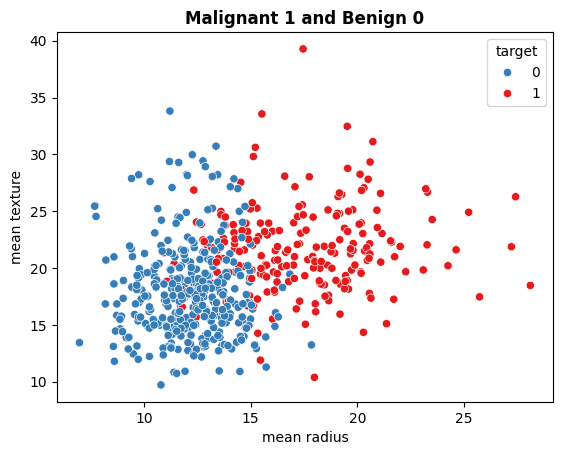

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

set1 = sns.color_palette("Set1")

palette = [set1[1], set1[0]]

sns.scatterplot(
    data = df,
    x = 'mean radius',
    y = 'mean texture',
    hue = 'target',
    palette = palette,
)
plt.title("Malignant 1 and Benign 0",fontweight = 'bold')
plt.show()

### **🧪 5. Train–Test Split**

In [5]:
x = df.iloc[:,:-1]
y = df['target']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

### **⚖️ 6. Pipelining the Scaling and Weighted KNN model**

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [7]:
w_knn_clf = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(
            n_neighbors= 5,
            weights = 'distance', #weighted knn
            metric = 'minkowski',
            p = 2, #euclidean distance
            
        ))
    ]
)

### **7. Training**

In [8]:
w_knn_clf.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(weights='distance'))])

### **8. Scoring**

In [9]:
print(f"Training Score: {w_knn_clf.score(x_train, y_train)}")
print(f"Testing Score: {w_knn_clf.score(x_test, y_test)}")

Training Score: 1.0
Testing Score: 0.956140350877193


### **9. Prediction**

In [10]:
y_pred = w_knn_clf.predict(x_test)
y_pred_prob = w_knn_clf.predict_proba(x_test)[:,1]

### **10. Model Evaluation**

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n\n{confusion_matrix(y_test, y_pred)}")
print(f"\nClassification Report:\n\n{classification_report(y_test, y_pred)}")

Accuracy Score: 0.956140350877193
Confusion Matrix:

[[71  1]
 [ 4 38]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### **11. Classification Matrix Visualization**

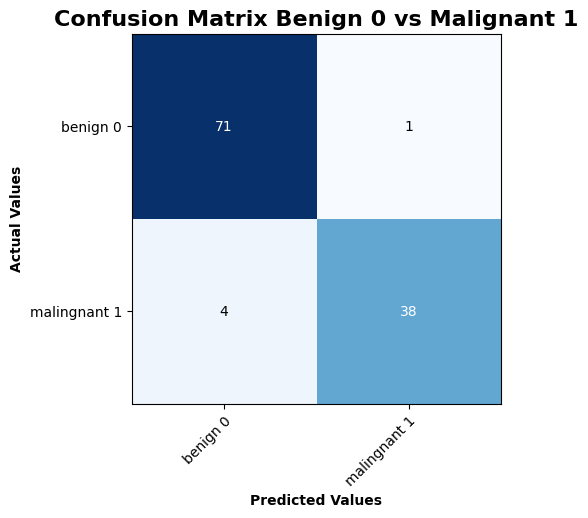

In [12]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(
    conf_mat = confusion_matrix(y_test, y_pred),
    class_names = ['benign 0', 'malingnant 1']
)

plt.xlabel("Predicted Values",fontweight = 'bold')
plt.ylabel("Actual Values", fontweight = 'bold')
plt.title("Confusion Matrix Benign 0 vs Malignant 1", fontweight = 'bold', fontsize = 16)
plt.show()

### **12. ROC CURVE Visualization**

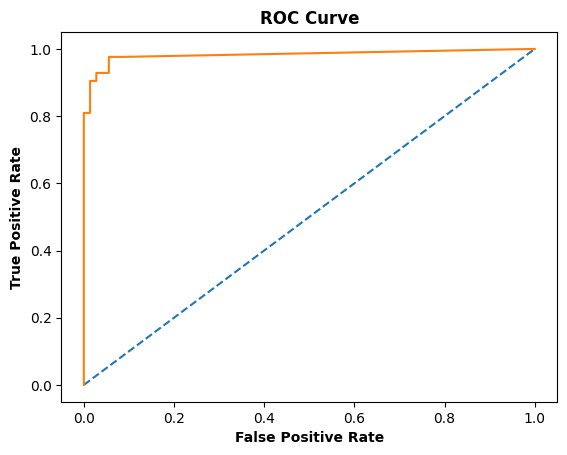

In [13]:
from sklearn.metrics import roc_curve

fpr, tpr, thresh = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1], linestyle= '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate",fontweight = 'bold')
plt.ylabel("True Positive Rate", fontweight = 'bold')
plt.title("ROC Curve",fontweight = 'bold')
plt.show()

### **13. Precision-Recall Curve**

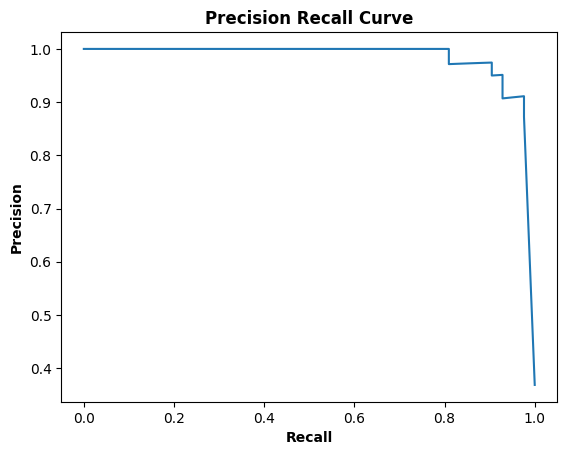

In [14]:
from sklearn.metrics import precision_recall_curve

pre, rec, thresh = precision_recall_curve(y_test, y_pred_prob)

plt.plot(rec, pre)
plt.xlabel("Recall", fontweight = 'bold')
plt.ylabel("Precision", fontweight = 'bold')
plt.title("Precision Recall Curve",fontweight = 'bold')
plt.show()

### **14. Learning Curve**

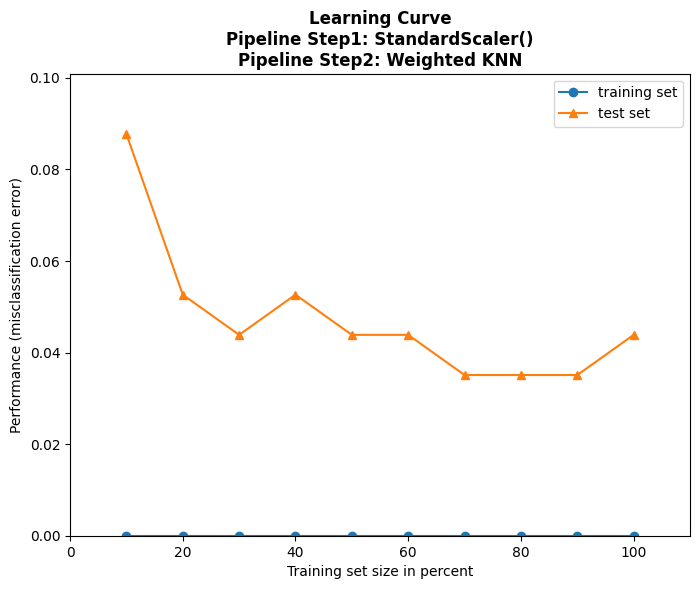

In [15]:
from mlxtend.plotting import plot_learning_curves

plt.figure(figsize = (8,6))
plot_learning_curves(
    x_train, y_train, 
    x_test, y_test, 
    clf = w_knn_clf)
plt.title("Learning Curve\nPipeline Step1: StandardScaler()\nPipeline Step2: Weighted KNN",fontweight = 'bold')
plt.show()

#### 💠 **Insights from the above plot**

**🔴 Training error is ZERO for all training sizes**

This line in the plot:

> **🔵 Training set error ≈ 0 for all sizes**

This almost never happens unless:

- The model **memorizes** the training data

- OR there is **data leakage**

- OR the learning curve function is being misused

With **Weighted KNN**, this is a huge clue.

#### **Why KNN (especially Weighted KNN) breaks learning curves 😈**

##### **🔹 How KNN learns**

**KNN is a lazy learner:**

- No parameters are learned

- The entire training set is memorized

##### **🔹 What happens in training error**

For a training point:

- Its **nearest neighbor is itself**

- Distance = 0

- Weight = very high (in weighted KNN)

➡️ Prediction is always correct

📌 This means:

> **Training error ≈ 0 is EXPECTED for KNN**

So this part of the plot is not a bug, but it makes learning curves **misleading** for KNN.

#### **What WOULD be “correct” analysis for KNN? ✅**

Instead of learning curves, use:

##### **🔹 Validation curve over K**

This shows **bias–variance tradeoff properly for KNN**.

Example:

- Small K → high variance

- Large K → high bias

**This is theoretically meaningful for KNN**.

### **NOW Creating Validation Curve**

In [16]:
k_values = range(1,31)

train_errors = []
test_errors = []

for k in k_values:
    pipeline = Pipeline(
        [
            ('scaler',StandardScaler()),
            ('knn', KNeighborsClassifier(
                n_neighbors= k,
                weights= 'distance',
                metric = 'minkowski',
                p = 2,
            ))
        ]
    )
    
    pipeline.fit(x_train, y_train)
    
    y_train_pred = pipeline.predict(x_train)
    y_test_pred = pipeline.predict(x_test)
    
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))

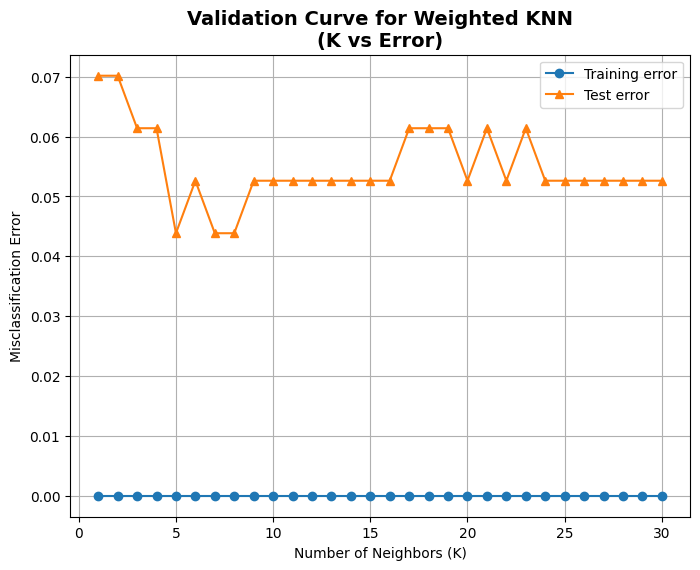

In [17]:
# now the actual plot

plt.figure(figsize = (8,6))
plt.plot(k_values, train_errors, marker='o', label= 'Training error')
plt.plot(k_values, test_errors, marker = '^', label = "Test error")

plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Misclassification Error")
plt.title("Validation Curve for Weighted KNN\n(K vs Error)", fontweight = 'bold', fontsize = 14)
plt.legend()
plt.grid(True)
plt.show()